In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix

In [2]:
PATH_FILE = '~/Mega/Portfolio/dataset/classification/dataset_credit_risk.csv'
credit = pd.read_csv(PATH_FILE)

In [3]:
credit.head()

,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,marital.status,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,1,1,18,3,2,1049,1,1,4,1,...,4,2,21,2,1,1,3,1,1,1
1,1,1,9,3,4,2799,1,2,2,3,...,2,1,36,2,1,2,3,2,1,1
2,1,2,12,2,4,841,2,3,2,1,...,4,1,23,2,1,1,2,1,1,1
3,1,1,12,3,4,2122,1,2,3,3,...,2,1,39,2,1,2,2,2,1,2
4,1,1,12,3,4,2171,1,2,4,3,...,4,2,38,1,2,2,2,1,1,2


In [128]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   credit.rating                   1000 non-null   int64
 1   account.balance                 1000 non-null   int64
 2   credit.duration.months          1000 non-null   int64
 3   previous.credit.payment.status  1000 non-null   int64
 4   credit.purpose                  1000 non-null   int64
 5   credit.amount                   1000 non-null   int64
 6   savings                         1000 non-null   int64
 7   employment.duration             1000 non-null   int64
 8   installment.rate                1000 non-null   int64
 9   marital.status                  1000 non-null   int64
 10  guarantor                       1000 non-null   int64
 11  residence.duration              1000 non-null   int64
 12  current.assets                  1000 non-null   int64
 13  age 

In [129]:
credit.nunique()

credit.rating                       2
account.balance                     3
credit.duration.months             33
previous.credit.payment.status      3
credit.purpose                      4
credit.amount                     923
savings                             4
employment.duration                 4
installment.rate                    4
marital.status                      3
guarantor                           2
residence.duration                  4
current.assets                      4
age                                53
other.credits                       2
apartment.type                      3
bank.credits                        2
occupation                          4
dependents                          2
telephone                           2
foreign.worker                      2
dtype: int64

In [130]:
credit.isna().sum()

credit.rating                     0
account.balance                   0
credit.duration.months            0
previous.credit.payment.status    0
credit.purpose                    0
credit.amount                     0
savings                           0
employment.duration               0
installment.rate                  0
marital.status                    0
guarantor                         0
residence.duration                0
current.assets                    0
age                               0
other.credits                     0
apartment.type                    0
bank.credits                      0
occupation                        0
dependents                        0
telephone                         0
foreign.worker                    0
dtype: int64

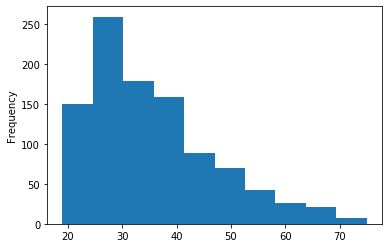

In [131]:
credit['age'].plot.hist()
plt.show()

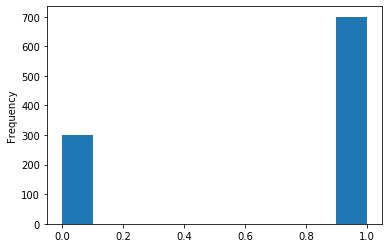

In [132]:
credit['credit.rating'].plot.hist()
plt.show()

In [134]:
credit_scaled = (credit - credit.min()) / (credit.max() - credit.min())

X = credit_scaled.drop(columns='credit.rating')
y = credit_scaled['credit.rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

1.0    468
0.0    202
Name: credit.rating, dtype: int64


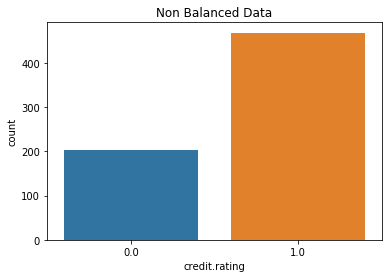

In [138]:
print(y_train.value_counts())
sns.countplot(y_train)
plt.title('Non Balanced Data')
plt.show()

0.0    468
1.0    468
Name: credit.rating, dtype: int64


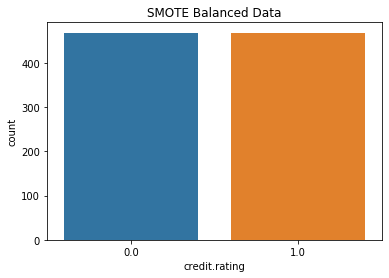

In [139]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)

print(y_smote.value_counts())
sns.countplot(y_smote)
plt.title('SMOTE Balanced Data')
plt.show()

## LOGISTIC REGRESSION

In [90]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

# model_lr = LinearRegression().fit(X_train, y_train)
# y_pred_lr = model_lr.predict(X_test)

####### REPORT

print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_lr))
print('')
print('Classification Report:\n',classification_report(y_test, y_pred_lr, digits=4))
print('')
print('Accuracy:',accuracy_score(y_test,y_pred_lr).round(4))
print('AUC:',roc_auc_score(y_test,y_pred_lr).round(4))
print('')

Confusion Matrix:
 [[ 41  57]
 [ 22 210]]

Classification Report:
               precision    recall  f1-score   support

         0.0     0.6508    0.4184    0.5093        98
         1.0     0.7865    0.9052    0.8417       232

    accuracy                         0.7606       330
   macro avg     0.7187    0.6618    0.6755       330
weighted avg     0.7462    0.7606    0.7430       330


Accuracy: 0.7606
AUC: 0.6618



In [96]:
from sklearn.linear_model import LogisticRegression

model_lr_smote = LogisticRegression().fit(X_smote, y_smote)
y_pred_lr_smote = model_lr_smote.predict(X_test)

# model_lr = LinearRegression().fit(X_train, y_train)
# y_pred_lr = model_lr.predict(X_test)

####### REPORT

print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_lr_smote))
print('')
print('Classification Report:\n',classification_report(y_test, y_pred_lr_smote, digits=4))
print('')
print('Accuracy:',accuracy_score(y_test,y_pred_lr_smote).round(4))
print('AUC:',roc_auc_score(y_test,y_pred_lr_smote).round(4))
print('')

Confusion Matrix:
 [[ 64  34]
 [ 57 175]]

Classification Report:
               precision    recall  f1-score   support

         0.0     0.5289    0.6531    0.5845        98
         1.0     0.8373    0.7543    0.7937       232

    accuracy                         0.7242       330
   macro avg     0.6831    0.7037    0.6891       330
weighted avg     0.7457    0.7242    0.7315       330


Accuracy: 0.7242
AUC: 0.7037



----